# Default Grover's algorithm to serve as a comparison with the optimized version

Import required packages and initialize the least busy backend

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))

Define the registers

In [2]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

Initialise and define the Oracle

In [3]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.cu1(pi, qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])

<ipython-input-3-846a03cc6dee>:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circuit.cu1(pi, qreg_q[0], qreg_q[1])


Diffuser 

In [4]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cu1(pi, qreg_q[0], qreg_q[1])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

<ipython-input-4-c5ec788ab9c8>:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circuit.cu1(pi, qreg_q[0], qreg_q[1])


Measurements

In [5]:
circuit.measure_all()

Simulation of the circuit

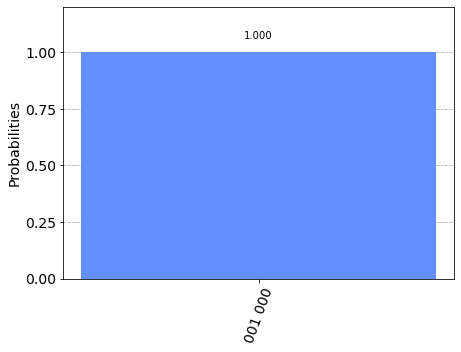

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Visualization of the circuit

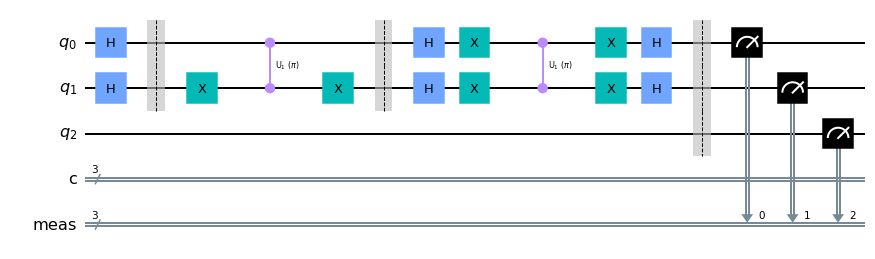

In [7]:
circuit.draw(output="mpl")

Processing of the circuit on quantum hardware

Job Status: job has successfully run


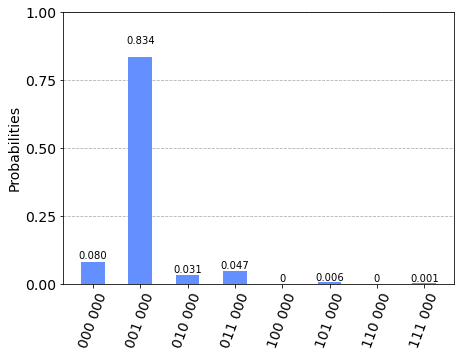

In [8]:
# Run on the least busy backend
transpiled_grover_circuit = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)